# **Artificial Intelligence: Concept and Practice**
## *Lesson 3: Machine Learning in Practice*

> Use Random Forest to classify the price of Mobile phone
>> https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [1]:
#######################
# Buildup Environment #
#######################
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
import matplotlib.pyplot as plt

###############
# Data Import #
###############
data = pd.read_csv("./train.csv")
data.head()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [2]:
data.shape

(2000, 21)

In [3]:
###################
# Model Training #
##################
# Price range predict classification(1/2)
y = data['price_range']
x = data.drop('price_range', axis = 1)

# Split train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 7)

# None setting parameter RF model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [4]:
########################
# Predict Performance #
#######################
y_pred = rf.predict(x_test)

print("Default RF Model Accuracy: %f" %(metrics.accuracy_score(y_test, y_pred)))

Default RF Model Accuracy: 0.860000


In [5]:
##################
# Hyperparameter #
##################
start = time.time()
random_grid = dict(n_estimators = [int(x) for x in np.linspace(start = 500, stop = 3000, num = 10)], 
                   criterion = ['gini', 'entropy'], oob_score = [True, False])

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring = 'accuracy',
                               n_iter = 20, cv = 10, verbose = 10, n_jobs = -1)

random_result = rf_random.fit(x_train, y_train)
end = time.time()

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   50.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2

In [7]:
#########################
# Hyperparameter Result #
#########################
print("""Best Predict Accuracy: %f
Parameter Selected: %s
Elapsed Time: %f secs""" 
%(random_result.best_score_, random_result.best_params_, end - start))

Best Predict Accuracy: 0.878000
Parameter Selected: {'oob_score': False, 'n_estimators': 2444, 'criterion': 'entropy'}
Elapsed Time: 171.082438 secs


In [8]:
#############
# New Model #
#############
rf_bestparam = RandomForestClassifier(criterion = 'entropy', n_estimators = 2444, 
                                      oob_score = False, random_state = 7)
rf_bestparam.fit(x_train, y_train)
y_bestpred = rf_bestparam.predict(x_test)

print("Best RF Model Accuracy: %f" %(metrics.accuracy_score(y_test, y_bestpred)))

Best RF Model Accuracy: 0.878000


C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


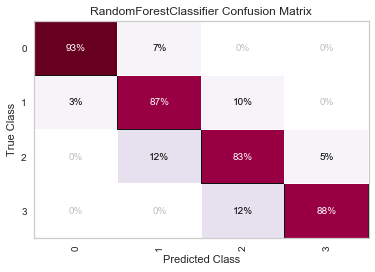

In [9]:
#############################################
# Percentage Confusion Matrix of Each Class #
#############################################
confusion = ConfusionMatrix(rf_bestparam, percent = True, cmap = 'PuRd')
confusion.fit(x_train, y_train)
confusion.score(x_test, y_test)
confusion.show()

C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


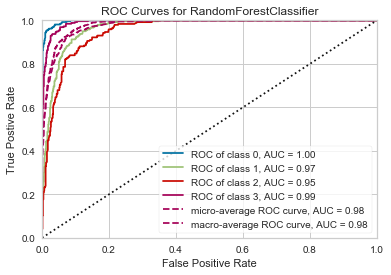

In [10]:
###########################
# ROC Curve of Each Class #
###########################
roc = ROCAUC(rf_bestparam)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()